Importing libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data 

In [2]:
df = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv')

## Data Exploration

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
print('Shape of the Dataset : ',df.shape)

Shape of the Dataset :  (3900, 18)


In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
#checking null values
df.isnull().sum().sum()

0

In [8]:
#checking for duplicate values
df.duplicated().sum()

0

In [9]:
#droping unwanted columns
df.drop(['Customer ID'],axis=1,inplace=True)

In [10]:
# Review descriptive data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


## EDA using cutecharts library
cutecharts library is a python hand-painted styles visualization package.

In [11]:
!pip install cutecharts

In [12]:
import cutecharts.charts as ctc

In [13]:
df_gender = df['Gender'].value_counts().to_frame(name='count')
df_gender

,count
Gender,
Male,2652
Female,1248


In [14]:
donut = ctc.Pie('Shopping rate based on Gender')   #add title

donut.set_options(labels = list(df_gender.index ), inner_radius = 0.4)
donut.add_series(list(df_gender['count']))
donut.render_notebook()   #display the chart

In [15]:
df_category = df['Category'].value_counts().to_frame(name='count')
df_category 

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [16]:
pie=ctc.Pie('Most shopped Category', width='720px',height='720px')  # add title

pie.set_options(labels=list(df_category.index),inner_radius=0)    #country names as labels ,inner radius set to 0
pie.add_series(list(df_category['count']))     #label to be shown on graph

pie.render_notebook()   #display the chart

In [17]:
df['Review Rating'] = round(df['Review Rating'])
df['Review Rating'].unique()

array([3., 4., 5., 2.])

In [18]:
df_rating = df['Review Rating'].value_counts().to_frame(name='count')
df_rating

,count
Review Rating,
4.0,1710
3.0,1424
5.0,700
2.0,66


In [19]:
bar=ctc.Bar('Rating of online shopping')    #add title

bar.set_options(labels=list(df_rating.index),x_label='Rating',y_label='Count')  #set the chart options
bar.add_series('Count',list(df_rating['count']))

bar.render_notebook()   #display the chart

In [20]:
df_PaymentMethod = df['Payment Method'].value_counts().to_frame(name='count')
df_PaymentMethod

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


In [21]:
bar2=ctc.Bar('Payment Method') 

bar2.set_options(labels=list(df_PaymentMethod.index),x_label='Payment Method',y_label='Count')  
bar2.add_series('Count',list(df_PaymentMethod['count']))

bar2.render_notebook()   

## Table filter using Interact function

The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets.

In [22]:
from ipywidgets import interact

### Filter by Rating

In [23]:
@interact
def filter_rating(rating=(0,5,1)):
    return df[df['Review Rating']==rating].head().style.background_gradient(cmap='Greens')

interactive(children=(IntSlider(value=2, description='rating', max=5), Output()), _dom_classes=('widget-intera…

### Filter by Gender

In [24]:
@interact
def filter_gender(gender=list(df.Gender.unique())):
    return df[df.Gender==gender].head().style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='gender', options=('Male', 'Female'), value='Male'), Output()), _do…

### Filter by Location

In [25]:
@interact
def filter_location(location=list(df.Location.unique())):
    return df[df.Location==location].head().sort_values(by='Location').style.background_gradient(cmap='spring')

interactive(children=(Dropdown(description='location', options=('Kentucky', 'Maine', 'Massachusetts', 'Rhode I…

### Top 5 Location where most of the purchase was made

In [26]:
top_5 = df['Location'].value_counts()[:5]
top_5

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: count, dtype: int64

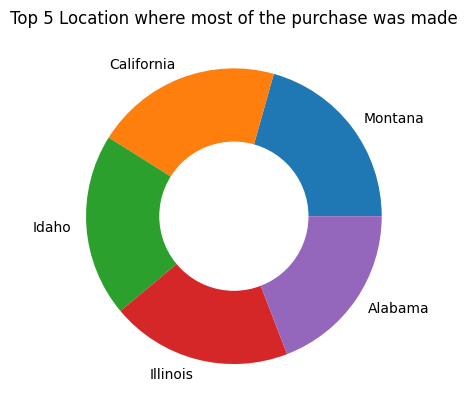

In [27]:
plt.pie(top_5,labels=top_5.index)
circle = plt.Circle( (0,0),0.5,color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Top 5 Location where most of the purchase was made')
plt.show()

### Location with minimum purchase

In [28]:
df['Location'].value_counts()[-5:].rename_axis('Location').reset_index(name='count').style.background_gradient(cmap='Blues_r')

,Location,count
0,New Jersey,67
1,Hawaii,65
2,Arizona,65
3,Kansas,63
4,Rhode Island,63


### Most popular

In [29]:
popular_Item_Purchased=df['Item Purchased'].value_counts()[:10].rename_axis('Item Purchased').reset_index(name='count')
popular_Item_Purchased.style.background_gradient(cmap='Blues_r')

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Belt,161
8,Sunglasses,161
9,Coat,161


<Axes: title={'center': 'Popular Item Purchased'}, xlabel='count', ylabel='Item Purchased'>

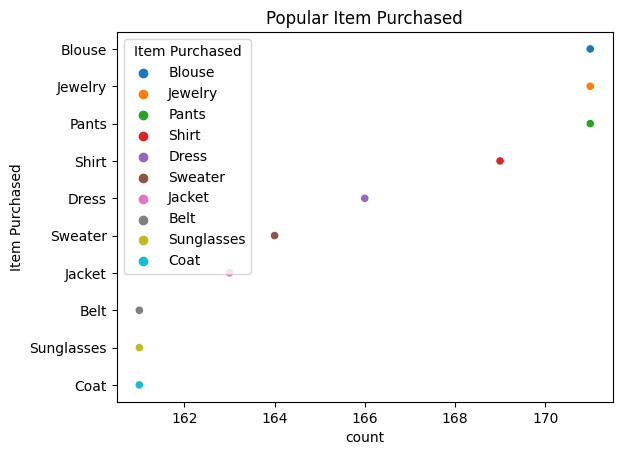

In [30]:
plt.title("Popular Item Purchased") 

sns.scatterplot(y=popular_Item_Purchased['Item Purchased'],x=popular_Item_Purchased['count'],hue=popular_Item_Purchased['Item Purchased'])

In [31]:
# Analysing 'Season' column

df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Season'>

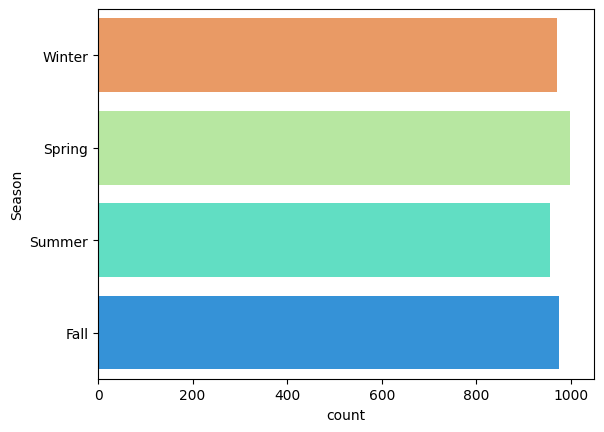

In [32]:
sns.countplot(y='Season',data=df,palette='rainbow_r')